In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

Ejercicio de regresión. Aqui predecimos el comportamiento de una onda sinusoidal

Epoch 1/10
20/20 [==============================] - 0s 6ms/step - loss: 0.5426 - mse: 0.5426 - val_loss: 0.5839 - val_mse: 0.5839
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 0.4785 - mse: 0.4785 - val_loss: 0.5532 - val_mse: 0.5532
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 0.4499 - mse: 0.4499 - val_loss: 0.5712 - val_mse: 0.5712
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 0.4281 - mse: 0.4281 - val_loss: 0.5978 - val_mse: 0.5978
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.4118 - mse: 0.4118 - val_loss: 0.5930 - val_mse: 0.5930
Epoch 6/10
20/20 [==============================] - 0s 3ms/step - loss: 0.3873 - mse: 0.3873 - val_loss: 0.6252 - val_mse: 0.6252
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 0.3601 - mse: 0.3601 - val_loss: 0.6282 - val_mse: 0.6282
Epoch 8/10
20/20 [==============================] - 0s 3ms/step - loss: 0.3332 - mse: 0.33

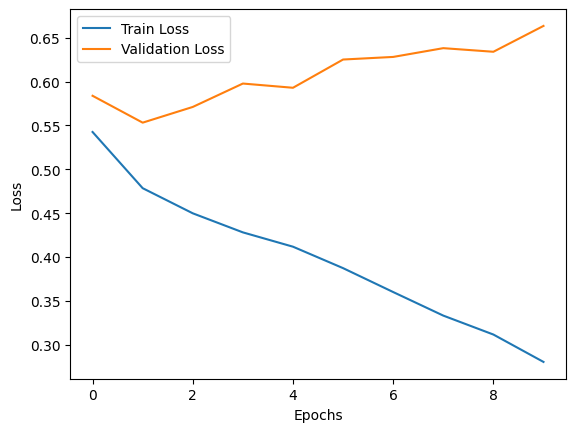

7/7 [==============================] - 0s 833us/step


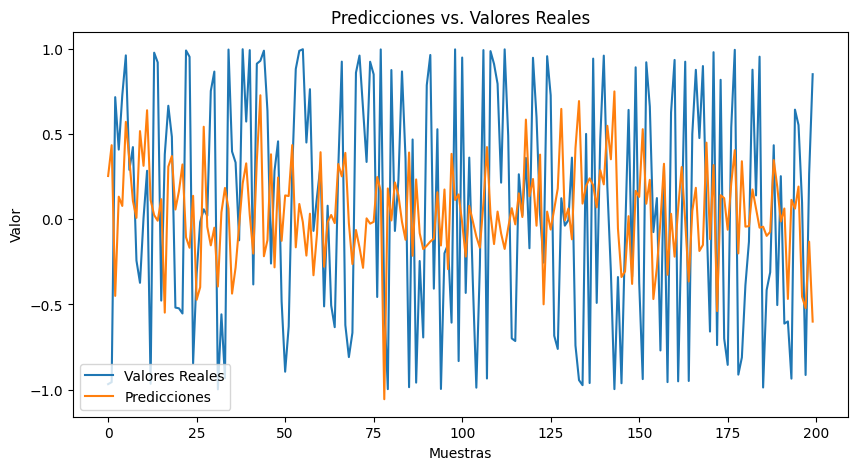

In [50]:
# Genera datos de ejemplo para regresión
num_samples = 1000
input_shape = (100, 1)  # Longitud de la secuencia
output_shape = 1  # Salida unidimensional

# Genera datos de entrada aleatorios en forma de onda sinusoidal
X = np.random.rand(num_samples, *input_shape) * 2 - 1  # Es una lista con 1000 elementos, donde cada elemento tiene 100 elementos con valores entre -1y1
y = np.sin(2 * np.pi * np.sum(X, axis=1)).reshape(-1, 1)  # Salida es una onda sinusoidal. Es una lista con 1000 elementos.
#X sera en realidad una lista con N espectros, donde cada posición n tiene el flujo de cada espectro.


# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea el modelo de CNN para regresión

#Elegimos modelo de la red convolucional
model = Sequential()

# Agregamos capa convolucional
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],1))) ## considerar tanh

#Agregamos capa de max pooling
model.add(MaxPooling1D(pool_size=2))

#Aplanamos la salida
model.add(Flatten())

#Agregamos capas densas
model.add(Dense(128, activation='relu'))  ## considerar tanh
model.add(Dense(output_shape, activation='linear'))  # Capa de salida lineal para regresión, output_shape debe ser =1

# Compila el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse']) ## considerar el mae y huber.

# Entrena el modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)



# Evalúa el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Mean Squared Error (MSE) or loss:", loss)
print(f'Accuracy: {accuracy * 100:.2f}%')

#Visualización del Rendimiento
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()



# Hacer predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Visualizar las predicciones y los valores reales
plt.figure(figsize=(10, 5))
plt.plot(y_test, label="Valores Reales")
plt.plot(predictions, label="Predicciones")
plt.legend()
plt.title("Predicciones vs. Valores Reales")
plt.xlabel("Muestras")
plt.ylabel("Valor")
plt.show()



Ejercicio de clasifiación

Epoch 1/10
20/20 [==============================] - 0s 7ms/step - loss: 1.1225 - accuracy: 0.3172 - val_loss: 1.1473 - val_accuracy: 0.2313
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 1.0973 - accuracy: 0.3781 - val_loss: 1.1245 - val_accuracy: 0.2875
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 1.0778 - accuracy: 0.4297 - val_loss: 1.0917 - val_accuracy: 0.4125
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 1.0539 - accuracy: 0.4797 - val_loss: 1.0719 - val_accuracy: 0.4187
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 1.0304 - accuracy: 0.4969 - val_loss: 1.1681 - val_accuracy: 0.3313
Epoch 6/10
20/20 [==============================] - 0s 3ms/step - loss: 1.0594 - accuracy: 0.4297 - val_loss: 1.1457 - val_accuracy: 0.3250
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 1.0170 - accuracy: 0.4906 - val_loss: 1.0722 - val_accuracy: 0.4125
Epoch 8/10
20/20 [==

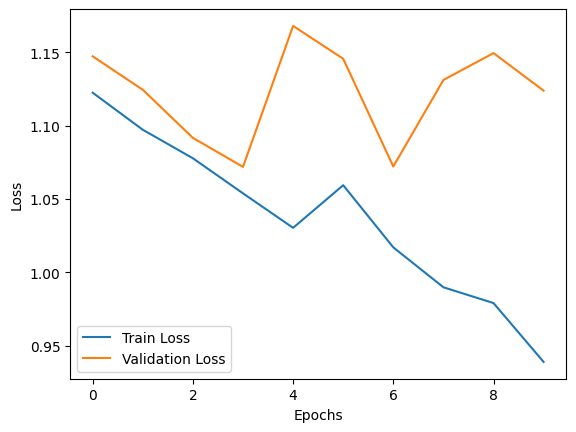

7/7 [==============================] - 0s 834us/step
Predicción: 2 Etiqueta Real: 0
Predicción: 2 Etiqueta Real: 2
Predicción: 2 Etiqueta Real: 0
Predicción: 2 Etiqueta Real: 1
Predicción: 2 Etiqueta Real: 0
Predicción: 1 Etiqueta Real: 0
Predicción: 1 Etiqueta Real: 1
Predicción: 0 Etiqueta Real: 2
Predicción: 2 Etiqueta Real: 1
Predicción: 2 Etiqueta Real: 1


In [66]:
# Genera datos de ejemplo
num_samples = 1000
input_shape = (100, 1)  # Longitud de la secuencia
num_classes = 3  # Número de clases

X = np.random.rand(num_samples, *input_shape)  # Datos de entrada aleatorios. Lista de 1000 elementos, en donde cada elemento tiene 100 elementos
y = np.random.randint(num_classes, size=num_samples)  # Etiquetas. Sus valores son 0,1,2 por las tres clases y tiene 1000 elementos con estos valores.

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convierte las etiquetas a codificación one-hot
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Crea el modelo de CNN
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compila el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrena el modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evalúa el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss:", loss)
print(f'Accuracy: {accuracy * 100:.2f}%')


#Visualización del Rendimiento
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Hacer predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Convierte las predicciones one-hot a etiquetas
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Visualizar algunas predicciones y etiquetas reales
for i in range(10):
    print("Predicción:", predicted_labels[i], "Etiqueta Real:", true_labels[i])
